# Medical Appointment No Shows
## Why do 30% of patients miss their scheduled appointments?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset contains ~110000 medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. 
Here are the rest of variables:

- **PatientId** = Identification of a patient
- **AppointmentID** = Identification of each appointment
- **Gender** = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man (when analysing this variable, it will probably a good idea to normalize this column and use proportions instead of raw numbers)
- **ScheduledDay** = The day someone called or registered the appointment, this is before appointment of course.
- **AppointmentDay** = The day of the actuall appointment, when they have to visit the doctor.
- **Age** = How old is the patient.
- **Neighbourhood** = Where the appointment takes place.
- **Scholarship** = Ture of False. Participation in Bolsa Família, a social welfare program of the Government of Brazil.
- **Hipertension** = True or False
- **Diabetes** = True or False
- **Alcoholism** = True or False
- **Handcap** = True or False
- **SMS_received** = 1 or more messages sent to the patient. 

The main question is, do some of the variables impact on no-show an appointment? If so, can we use this data to make a prediction?

Another question that is most interesting for me, do men no-show more often than women?

<a id='wrangling'></a>
## 1. Data Wrangling

### 1.0 Imports

In [3]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
%matplotlib inline

### 1.1 Loading dataset

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

### 1.2 Checking for null values:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data in the dataset! 

### 1.3 Checking for duplicates:

In [8]:
sum(df.duplicated())

0

There are no duplicates!

### 1.4. Cleaning data

There are no duplicates or missing data cells, but still I can see two problems that require cleaning:

#### 1.4.1 Converting strings to datetimes:

In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#### 1.4.2 Renaming column names:

In [10]:
df.columns = ['patient_id', 'applointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 
              'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show']

#### 1.4.3 Age column:

Describe the age column:

In [12]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

The minimum value is -1, so probably the age is missing for some rows. But how many of them?

In [19]:
df_age = df[df['age'] <= 0]
df_age.shape

(3539, 14)

There are a lot of rows with 0 age or less. Let's assign the mean age to this row.

In [20]:
df[df['age'] <= 0] = df['age'].mean()

In [21]:
df['age'].describe()

count    110527.000000
mean         38.276791
std          22.104561
min           1.000000
25%          20.000000
50%          37.089219
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [22]:
df.head()

,patient_id,applointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


Looks OK now!

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Men or Women?

To answer this question I decided to split the dataframe on men and women dataframes, and make a bar chart of the no-show column for both of them

In [23]:
# split the dataframe into male and female dataframes
df_men = df[df['gender'] == 'M']
df_women = df[df['gender'] == 'F']

To correctly plot the values, I normalize them by dividing each count by total length of dataframes

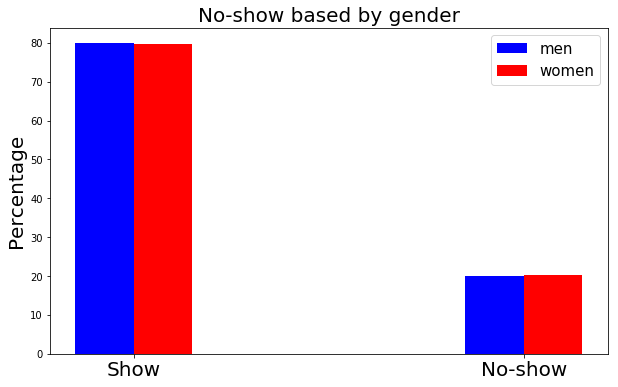

In [49]:
# create subplots and plot two bars: for men and female data
fig, ax = plt.subplots( figsize=(10,6))
x = np.arange(2)
width = 0.15
ax.bar(x,df_men['no_show'].value_counts() * 100 /len(df_men), width = width, color='b', label = 'men')
ax.bar(x + width,df_women['no_show'].value_counts() * 100 /len(df_women),width = width,color='r', label = 'women')
plt.title('No-show based by gender',fontsize=20)
plt.xticks(x + width/2, ['Show', 'No-show'], fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.legend(fontsize=15)
plt.show()

These two bar charts looks pretty similar. So we can't clearly say that men or women no-show more often.

### Research Question 2: Which of the variables affect on no-show?

#### Investigating booleans
We have several boolean variables: scholarship, hipertension, diabetes, alcoholism,	handcap and	sms_received. The process for each of them is quite the same as for gender. 

Start with alcoholism.

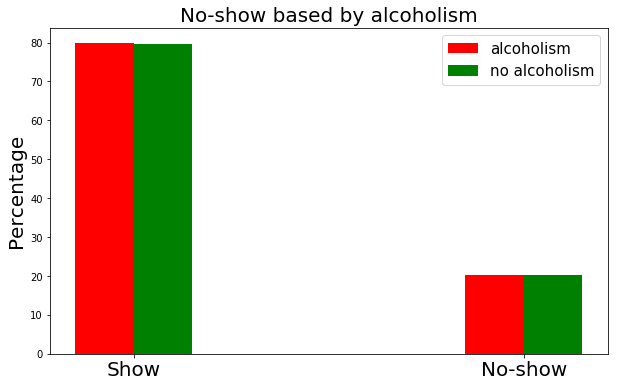

In [50]:
# split the initial dataframe into ones that contain patients with alcoholism and patients without alcoholism
df_alc = df[df['alcoholism'] == 1]
df_nalc = df[df['alcoholism'] == 0]

# create subplots and plot two bars: for patients with alcoholism and without alcoholism
fig, ax = plt.subplots( figsize=(10,6))
x = np.arange(2)
width = 0.15
ax.bar(x,df_alc['no_show'].value_counts() * 100 /len(df_alc), width = width, color='r', label = 'alcoholism')
ax.bar(x + width,df_nalc['no_show'].value_counts() * 100 /len(df_nalc),width = width,color='g', label = 'no alcoholism')
plt.title('No-show based by alcoholism',fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(x + width/2, ['Show', 'No-show'], fontsize=20)
plt.legend(fontsize=15)
plt.show()

No correlation.

Now scholarship:

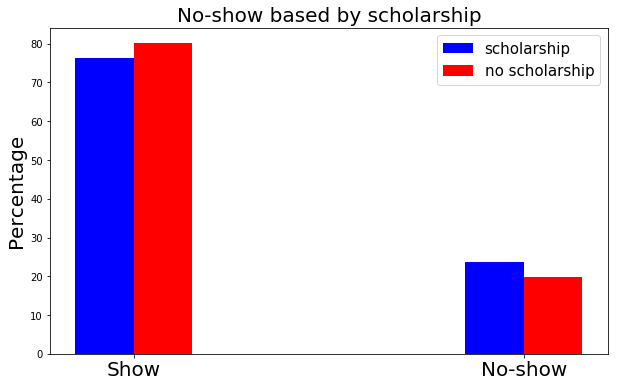

In [52]:
# split the initial dataframe into ones that contain patients with scholarship and patients without scholarship
df_sc = df[df['scholarship'] == 1]
df_nsc = df[df['scholarship'] == 0]

# create subplots and plot two bars: for patients with scholarship and without scholarship
fig, ax = plt.subplots( figsize=(10,6))
x = np.arange(2)
width = 0.15
ax.bar(x,df_sc['no_show'].value_counts() * 100 /len(df_sc), width = width, color='b', label = 'scholarship')
ax.bar(x + width,df_nsc['no_show'].value_counts() * 100 /len(df_nsc),width = width,color='r', label = 'no scholarship')
plt.title('No-show based by scholarship',fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(x + width/2, ['Show', 'No-show'], fontsize=20)
plt.legend(fontsize=15)
plt.show()

People with scholarship tend to no-show more often, but the plots are still very similar.

Hipertension:

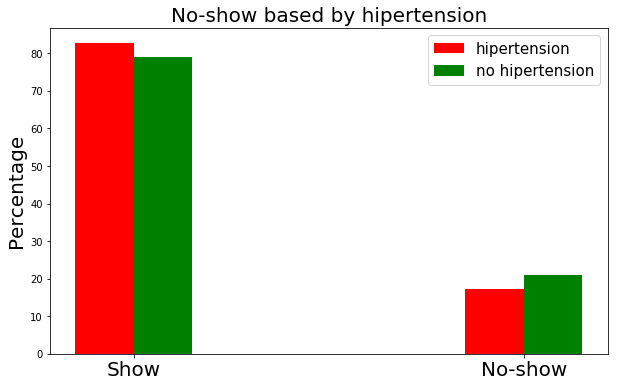

In [59]:
# split the initial dataframe into ones that contain patients with hipertension and patients without hipertension
df_hyp = df[df['hipertension'] == 1]
df_nhyp = df[df['hipertension'] == 0]

# create subplots and plot two bars: for patients with hipertension and without hipertension
fig, ax = plt.subplots( figsize=(10,6))
x = np.arange(2)
width = 0.15
ax.bar(x,df_hyp['no_show'].value_counts() * 100 /len(df_hyp), width = width, color='r', label = 'hipertension')
ax.bar(x + width,df_nhyp['no_show'].value_counts() * 100 /len(df_nhyp),width = width,color='g', label = 'no hipertension')
plt.title('No-show based by hipertension',fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(x + width/2, ['Show', 'No-show'], fontsize=20)
plt.legend(fontsize=15)
plt.show()

Again, the correlation is not strong enough.

Diabetes:

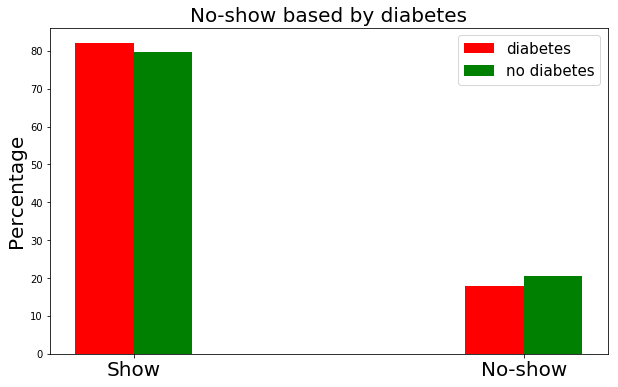

In [60]:
# split the initial dataframe into ones that contain patients with diabetes and patients without diabetes
df_dia = df[df['diabetes'] == 1]
df_ndia = df[df['diabetes'] == 0]

# create subplots and plot two bars: for patients with diabetes and without diabetes
fig, ax = plt.subplots( figsize=(10,6))
x = np.arange(2)
width = 0.15
ax.bar(x,df_dia['no_show'].value_counts() * 100 /len(df_dia), width = width, color='r', label = 'diabetes')
ax.bar(x + width,df_ndia['no_show'].value_counts() * 100 /len(df_ndia),width = width,color='g', label = 'no diabetes')
plt.title('No-show based by diabetes',fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(x + width/2, ['Show', 'No-show'], fontsize=20)
plt.legend(fontsize=15)
plt.show()

Same: no strong correlation found.

Handcap:

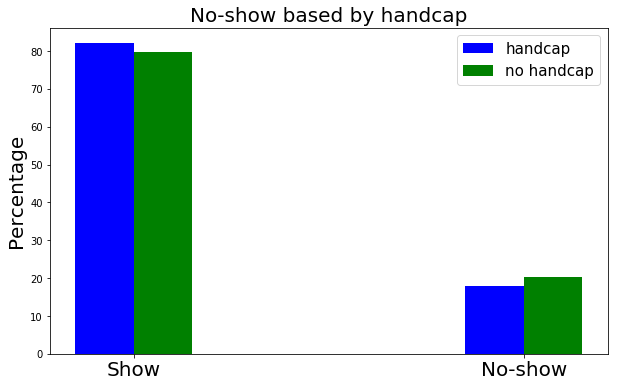

In [61]:
# split the initial dataframe into ones that contain patients with handcap and patients without handcap
df_hc = df[df['handcap'] == 1]
df_nhc = df[df['handcap'] == 0]

# create subplots and plot two bars: for patients with handcap and without handcap
fig, ax = plt.subplots( figsize=(10,6))
x = np.arange(2)
width = 0.15
ax.bar(x,df_hc['no_show'].value_counts() * 100 /len(df_hc), width = width, color='b', label = 'handcap')
ax.bar(x + width,df_nhc['no_show'].value_counts() * 100/len(df_nhc),width = width,color='g', label = 'no handcap')
plt.title('No-show based by handcap',fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(x + width/2, ['Show', 'No-show'], fontsize=20)
plt.legend(fontsize=15)
plt.show()

Again no strong correlation.

Sms received:

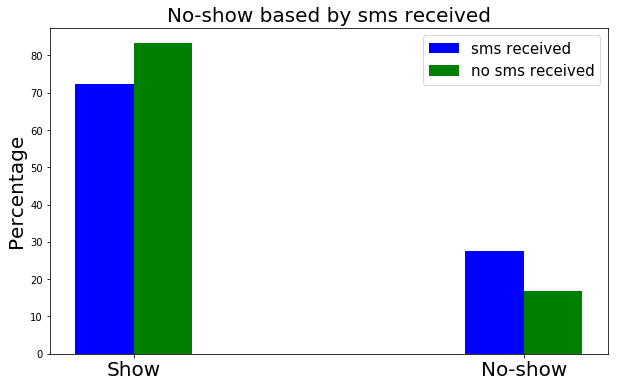

In [62]:
# split the initial dataframe into ones that contain patients who recieved sms and patients who didn't
df_sms = df[df['sms_received'] == 1]
df_nsms = df[df['sms_received'] == 0]

# create subplots and plot two bars: for patients who recieved sms and patients who didn't
fig, ax = plt.subplots( figsize=(10,6))
x = np.arange(2)
width = 0.15
ax.bar(x,df_sms['no_show'].value_counts() * 100 /len(df_sms), width = width, color='b', label = 'sms received')
ax.bar(x + width,df_nsms['no_show'].value_counts() * 100/len(df_nsms),width = width,color='g', label = 'no sms received')
plt.title('No-show based by sms received',fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(x + width/2, ['Show', 'No-show'], fontsize=20)
plt.legend(fontsize=15)
plt.show()

Here is a correlation: if a patient received 1 or more sms, the chance that he won't show almost doubles. But it probably doesn't mean causation. We don't know when the sms was sent. It probably was sent after the scheduled time. 

So, none of the boolean variables gave us a solid correlation. 

#### Men with alcoholism

Time for 2d exploration. I want to combine gender and alcoholism and see if this combination affect the no-show column.

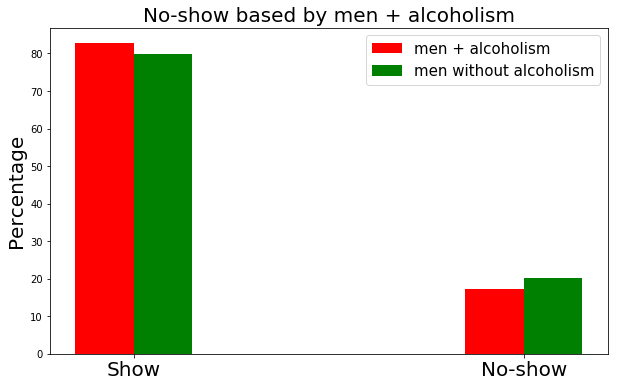

In [66]:
# split the men dataframe into ones that contain men with alcoholism and men without alcoholism
df_menal = df_men[df_men['alcoholism'] == 1]
df_mennoal = df_men[df_men['alcoholism'] == 0]

# create subplots and plot two bars: for men with alcoholism and men without alcoholism
fig, ax = plt.subplots( figsize=(10,6))
x = np.arange(2)
width = 0.15
ax.bar(x,df_menal['no_show'].value_counts() * 100 /len(df_menal), width = width, color='r', label = 'men + alcoholism')
ax.bar(x + width,df_mennoal['no_show'].value_counts() * 100/len(df_mennoal),width = width,color='g', label = 'men without alcoholism')
plt.title('No-show based by men + alcoholism',fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(x + width/2, ['Show', 'No-show'], fontsize=20)
plt.legend(fontsize=15)
plt.show()

Hence there wasn't any correlation on gender or alcoholism, the combined feature has a small correlation.

#### Women with alcoholism

Same exploration for women:

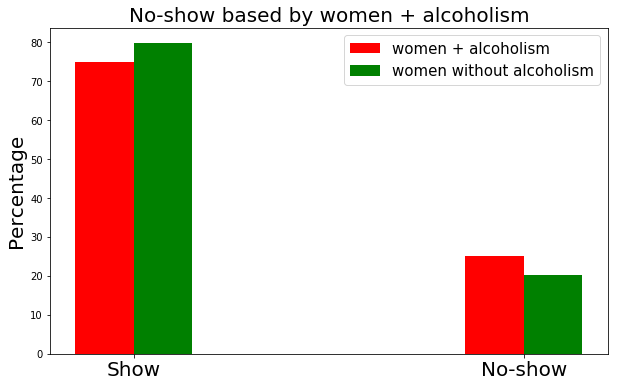

In [67]:
# split the women dataframe into ones that contain women with alcoholism and women without alcoholism
df_wnal = df_women[df_women['alcoholism'] == 1]
df_wnnoal = df_women[df_women['alcoholism'] == 0]

# create subplots and plot two bars: for women with alcoholism and women without alcoholism
fig, ax = plt.subplots( figsize=(10,6))
x = np.arange(2)
width = 0.15
ax.bar(x,df_wnal['no_show'].value_counts() * 100 /len(df_wnal), width = width, color='r', label = 'women + alcoholism')
ax.bar(x + width,df_wnnoal['no_show'].value_counts() * 100/len(df_wnnoal),width = width,color='g', label = 'women without alcoholism')
plt.title('No-show based by women + alcoholism',fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(x + width/2, ['Show', 'No-show'], fontsize=20)
plt.legend(fontsize=15)
plt.show()

This correlation is also small, but very different! Women with alcoholism tend to no-show more often. The men's bar chartshows the opposite correlation.

#### Age exploration.

Now, I want to see some statistics about the age of patients.

In [33]:
df['age'].describe()

count    110527.000000
mean         38.276791
std          22.104561
min           1.000000
25%          20.000000
50%          37.089219
75%          55.000000
max         115.000000
Name: age, dtype: float64

Let's plot a simple histogram of this column

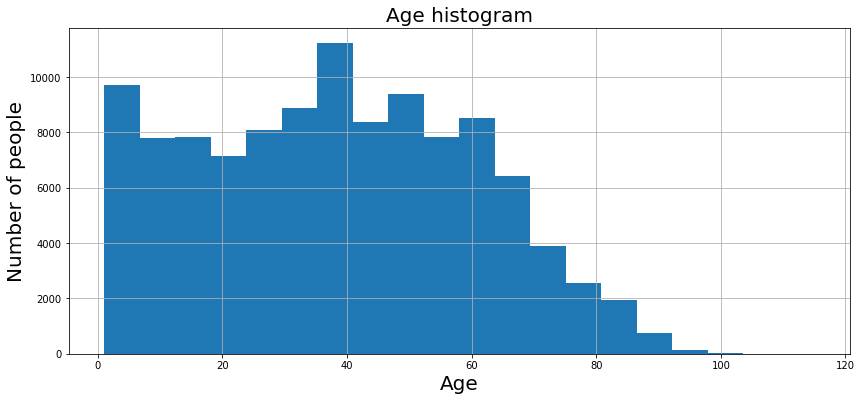

In [88]:
plt.title('Age histogram', fontsize = 20)
plt.ylabel('Number of people', fontsize=20)
plt.xlabel('Age',fontsize=20)
df['age'].hist(bins = 20, figsize = (14,6));

Nothing special here. The histogram has two obvious peaks. 
- First few years of living a baby just needs medical attention to grow healthy
- At the age of ~40 person has been working for ~20 years and probably has some disease. 

Now, I want to add a new column named "age_str", that indicates if the person is young (20 years or less), adult(18-55), or old(>55)

In [68]:
# a function that filters the age into 3 groups
def age_to_str(row):
    if(row['age'] <= 20):
        return 'young'
    elif (row['age'] <=55):
        return 'adult'
    else:
        return 'old'
# creating a new column with a categorical representation of age
df['age_str'] = df.apply(lambda row: age_to_str(row), axis = 1)

In [69]:
df.head()

,patient_id,applointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_str
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No,old
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No,old
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No,old
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No,young
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No,old


And now I want to make a pie plots of show and no-show entries based by ages.

In [70]:
df_showage = df[df['no_show'] == 'Yes']
df_noshowage = df[df['no_show'] == 'No']

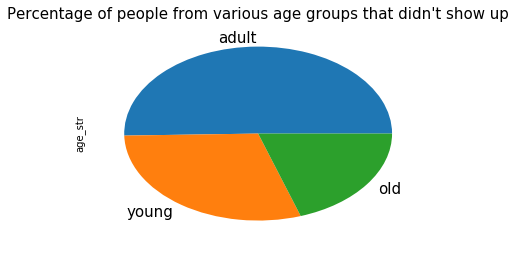

In [99]:
plt.title("Percentage of people from various age groups that didn't show up",fontsize = 15)
(df_showage['age_str'].value_counts() * 100 / len(df_showage)).plot(kind = 'pie', fontsize = 15);

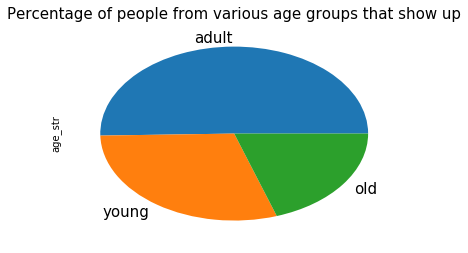

In [100]:
plt.title("Percentage of people from various age groups that show up",fontsize = 15)
(df_noshowage['age_str'].value_counts() * 100 / len(df_noshowage)).plot(kind = 'pie', fontsize = 15);

Again, these two pie charts are identical. So the age doens't matter too.

<a id='conclusions'></a>
## Conclusions

### Results: our data suggests that:

1. Men and women don't show an appointment equally often. 
2. Having alcoholism, hypertension, scholarship, diabetes or handcap doesn't seem to make people more likely to miss an appointment.
3. Age groups distribution is the same for those who missed the appointment and for those who didn't.

### Limitations:

1. Most of the variables are categorical, so it's hard to find some strong correlations.
2. The "appointment_day" column doesn't contain information about time, so we can't analyse it properly. Maybe people tend to miss an appointment in early morning or in some rush hour.
3. The "sms_received" column is not well described. We don't know if the patient received an sms before the actual appointment or when she already missed the time. 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0